

## References

- https://jupysql.ploomber.io/en/latest/api/configuration.html#loading-from-a-file

In [ ]:



%load_ext sql
# %reload_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [6]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [9]:
%sql duckdb:///:memory:

In [ ]:
%sql duckdb:///:default:

In [5]:
import duckdb
import pandas as pd


conn = duckdb.connect()
%sql conn --alias duckdb

In [10]:
%sql SELECT 'Off and flying!' AS a_duckdb_column;

,a_duckdb_column
0,Off and flying!


In [13]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 10;

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,pg_typeof
2,pg_catalog,pg_type_is_visible
3,pg_catalog,pg_ts_template_is_visible
4,pg_catalog,pg_ts_parser_is_visible
5,pg_catalog,pg_ts_dict_is_visible
6,pg_catalog,pg_ts_config_is_visible
7,pg_catalog,pg_table_is_visible
8,pg_catalog,pg_size_pretty
9,pg_catalog,pg_postmaster_start_time


In [14]:
%sql res << SELECT 'Off and flying!' AS a_duckdb_column;

In [19]:
input_df = pd.DataFrame.from_dict({"i": [1, 2, 3], "j": ["one", "two", "three"]})

%sql output_df << SELECT sum(i) AS total_i FROM input_df;

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
(duckdb.duckdb.CatalogException) Catalog Error: Table with name input_df does not exist!
Did you mean "pg_attrdef"?

LINE 1: SELECT sum(i) AS total_i FROM input_df;
                                      ^
[SQL: SELECT sum(i) AS total_i FROM input_df;]
(Background on this error at: https://sqlalche.me/e/20/f405)

If you need help solving this issue, send us a message: https://ploomber.io/community


In [ ]:
%sql output_df << SELECT sum(i) AS total_i FROM input_df;

In [20]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


In [ ]:
%sqlplot boxplot --table https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

In [ ]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3




Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

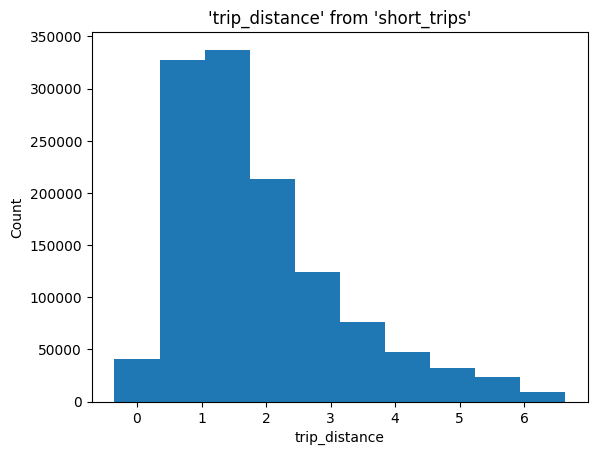

In [23]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10 --with short_trips